# Librerias

In [ ]:
%pip install nhanes
%pip install pyjanitor
%pip install missingno
%pip install session_info
%pip install UpSetPlot

In [5]:
import janitor
import matplotlib.pyplot as plt
import missingno
import nhanes.load
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sb
import session_info
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing
import statsmodels.api as sm
import statsmodels.datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

La imputación de datos se suele hacer por regresión

In [3]:
%run ./explore_tools/pandas-missing-extension.ipynb

# Imputación por series de tiempo

In [7]:
airquality_df = (sm.datasets
                 .get_rdataset("airquality")
                 .data.clean_names(case_type="snake")
                 .add_column('year',1973)
                 .assign(date = lambda df: pd.to_datetime(df[['year','month','day']]))
                 .sort_values(by='date').set_index('date'))
airquality_df
#Cuando se tienen series de tiempo, el id debe ser la fecha siendo esta la variable independiente

,ozone,solar_r,wind,temp,month,day,year
date,,,,,,,
1973-05-01,41.0,190.0,7.4,67,5,1,1973
1973-05-02,36.0,118.0,8.0,72,5,2,1973
1973-05-03,12.0,149.0,12.6,74,5,3,1973
1973-05-04,18.0,313.0,11.5,62,5,4,1973
1973-05-05,NaN,NaN,14.3,56,5,5,1973
...,...,...,...,...,...,...,...
1973-09-26,30.0,193.0,6.9,70,9,26,1973
1973-09-27,NaN,145.0,13.2,77,9,27,1973
1973-09-28,14.0,191.0,14.3,75,9,28,1973


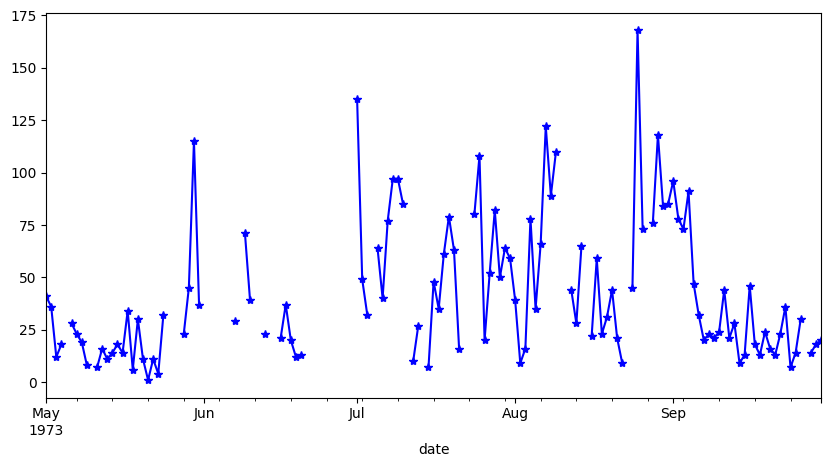

In [14]:
plt.figure(figsize=(10,5))
airquality_df['ozone'].plot(marker='*', linestyle='-', color='b')
plt.show()

Imputación por llenado hacia atras

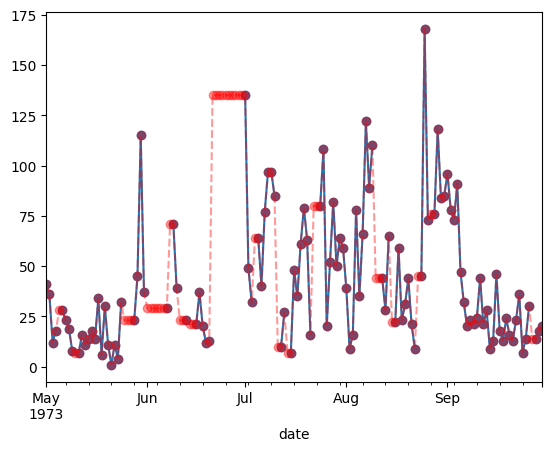

In [18]:
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.bfill().plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

Imputación llenado hacia adelante (se usa habitualmente, vease caso bolsa de valores)

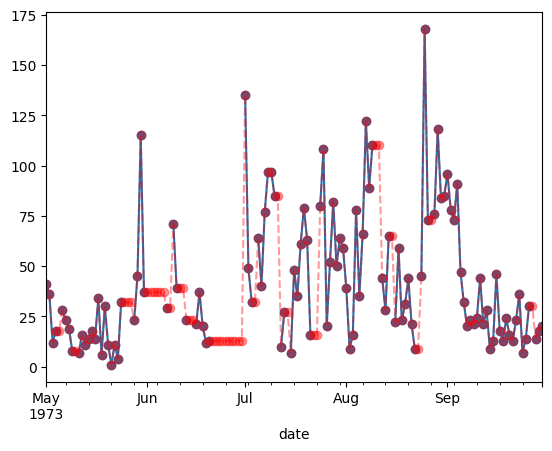

In [19]:
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.ffill().plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

Imputación por interpolación
Tiene varios metodos

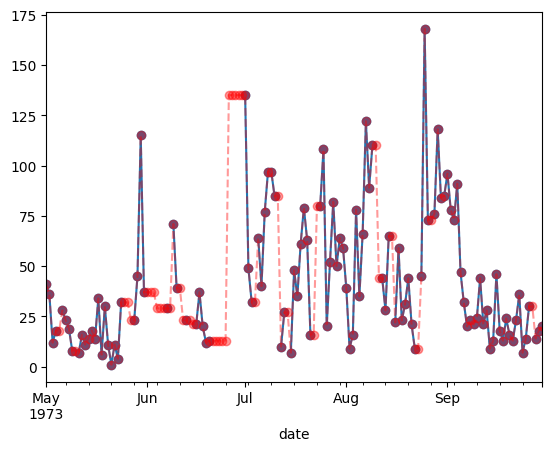

In [22]:
#Nearest
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='nearest').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

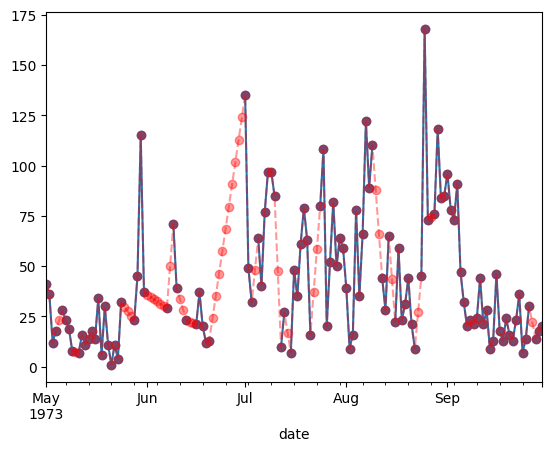

In [24]:
#Lineal
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='linear').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

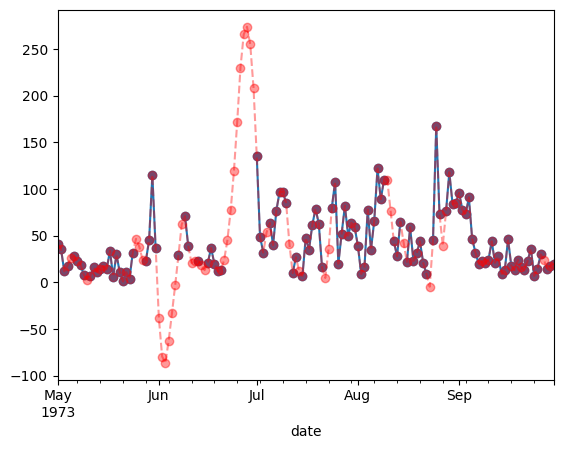

In [26]:
#Quadratic  (be carefil with this one, it can produce a lot of noise with the data, in this case negative ozone values)
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='quadratic').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

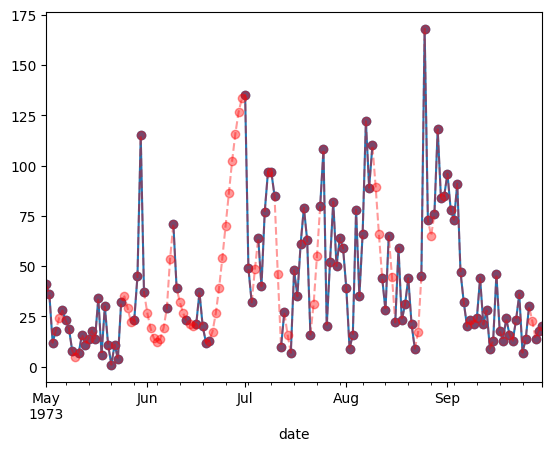

In [27]:
#Akima
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='akima').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()

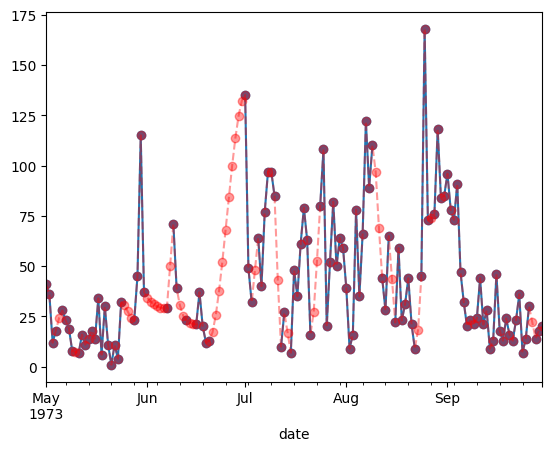

In [28]:
#pchip (Piecewise Cubic Hermite Interpolating Polynomial) Castiga tendendencias negativas
plt.plot(figsize=(20,20))
airquality_df.ozone.plot(marker = "o")
airquality_df.ozone.interpolate(method='pchip').plot(color="r", alpha=0.4, ls="dashed", marker = "o")
plt.show()